In [1]:
3+4

7

In [2]:
print("Hello")

Hello


## Summary

According to [fivethirtyeight](https://github.com/fivethirtyeight/data/tree/master/avengers)details the deaths of Marvel comic book characters between the 
time they joined the Avengers and April 30, 2015, the week before Secret Wars.

This project aims to clean the data set and remove some inconsistencies allowing for an easier analysis in 
pandas.

### Import packages

In [3]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()


In [4]:
# utf 8 did not work
# https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
# The solution was change the encoding to 'latin-1
url="https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv"
s=requests.get(url).content
avengers=pd.read_csv(io.StringIO(s.decode('latin-1')))

In [5]:
avengers.head(2)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...


In [6]:
avengers.shape

(173, 21)

In [7]:
avengers.columns.values

array(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'], dtype=object)

In [8]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
URL                            173 non-null object
Name/Alias                     163 non-null object
Appearances                    173 non-null int64
Current?                       173 non-null object
Gender                         173 non-null object
Probationary Introl            15 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           173 non-null int64
Years since joining            173 non-null int64
Honorary                       173 non-null object
Death1                         173 non-null object
Return1                        69 non-null object
Death2                         17 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

In [9]:
avengers.describe()

,Appearances,Year,Years since joining
count,173.000000,173.000000,173.000000
mean,414.052023,1988.445087,26.554913
std,677.991950,30.374669,30.374669
min,2.000000,1900.000000,0.000000
25%,58.000000,1979.000000,5.000000
50%,132.000000,1996.000000,19.000000
75%,491.000000,2010.000000,36.000000
max,4333.000000,2015.000000,115.000000


In [10]:
year = pd.Series(avengers["Year"], name="Year")
# Check
print(year.head())

0    1963
1    1963
2    1963
3    1963
4    1963
Name: Year, dtype: int64


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


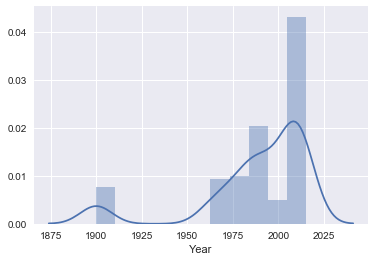

In [11]:
    
sns.distplot(year)
plt.show()

# https://github.com/mwaskom/seaborn/issues/1392
# Sorry, but it appears that the seaborn 0.8.1 package from conda 4.5.0 is lacking this patch.

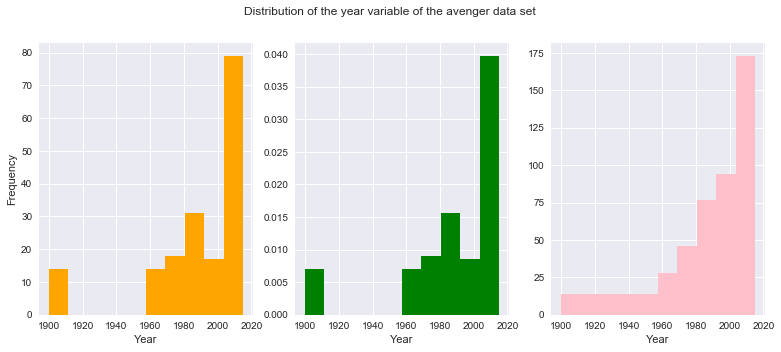

In [12]:
fig = plt.figure(figsize=(13,5))
fig.suptitle("Distribution of the year variable of the avenger data set")
ax1 = fig.add_subplot(131)
ax1.hist(year, color="orange")
ax1.set_xlabel("Year")
ax1.set_ylabel("Frequency")
ax2 = fig.add_subplot(132)
ax2.hist(year, density=True, color="green")
ax2.set_xlabel("Year")
ax3 = fig.add_subplot(133)
ax3.hist(year, cumulative=True, color="pink")
ax3.set_xlabel("Year")
plt.show()

There are avengers created in 1990, but the avengers series was created by Marvel in the 1960's. 
The year values lower than 1960 must be errors.

In [13]:
true_avengers = avengers[avengers["Year"] > 1959].copy()

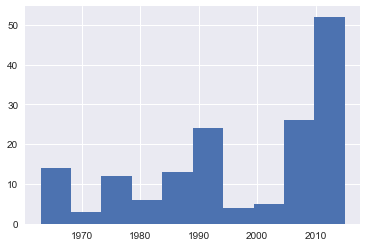

In [14]:
plt.hist(true_avengers["Year"])
plt.show()

The years below 1960 were successfully removed.

The total number of deaths each character is suffering is interesting. The number of
deaths is currently spread over 5 wide columns. The number of deaths is better
analysed by melting this wide data frame into a long one.

In [15]:
true_avengers['Death1'].unique()

array(['YES', 'NO'], dtype=object)

A new column Deaths contains the number of times each superhero died. 


In [16]:
def clean_deaths(row): 
    num_deaths = 0 
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

   

In [17]:
 true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

In [18]:
 true_avengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 172
Data columns (total 22 columns):
URL                            159 non-null object
Name/Alias                     149 non-null object
Appearances                    159 non-null int64
Current?                       159 non-null object
Gender                         159 non-null object
Probationary Introl            13 non-null object
Full/Reserve Avengers Intro    159 non-null object
Year                           159 non-null int64
Years since joining            159 non-null int64
Honorary                       159 non-null object
Death1                         159 non-null object
Return1                        68 non-null object
Death2                         16 non-null object
Return2                        16 non-null object
Death3                         2 non-null object
Return3                        2 non-null object
Death4                         1 non-null object
Return4                        1 non-null

Veryfying that the Years since joining field accurately reflects the Year column

In [19]:
year_today = 2015
avengers_years = true_avengers[["Year", "Years since joining"]].copy()
avengers_years["Calculated"] = year_today - year
avengers_years.head()

,Year,Years since joining,Calculated
0,1963,52,52
1,1963,52,52
2,1963,52,52
3,1963,52,52
4,1963,52,52


In [20]:
if avengers_years.loc[0, "Years since joining"] == avengers_years.loc[0, "Calculated"]:
    print("True")
else:
    print("False")
# works fine for checking one row but not multiple rows
# would throw an error if applied over the whole column, "any" etc.

True


In [21]:
# First write a function
# The use apply
# https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition


def check_years(row):
    if row["Years since joining"] == row["Calculated"]:
        value = 1
    else:
        value = 0
    return value

avengers_years["Check_difference"] = avengers_years.apply(check_years, axis=1)

In [22]:
avengers_years.head()

,Year,Years since joining,Calculated,Check_difference
0,1963,52,52,1
1,1963,52,52,1
2,1963,52,52,1
3,1963,52,52,1
4,1963,52,52,1


In [23]:
avengers_years.loc[avengers_years["Check_difference"] == 0, "Check_difference"].count()

0

In [24]:
avengers_years.loc[avengers_years["Check_difference"] == 1, "Check_difference"].count()

159

The Years since joining is correct. None False or 0 values, all True or 1 values in Check_difference.